# Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("/content/drive/MyDrive/Wells Fargo Project/train_data.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Wells Fargo Project/test_data.csv")
geo_df = gpd.read_file('/content/drive/MyDrive/Wells Fargo Project/geo_df/geo_df.shp')
zip_income = pd.read_csv("/content/drive/MyDrive/Wells Fargo Project/zip_income.csv")
alert_ratio1 = pd.read_csv("/content/drive/MyDrive/Wells Fargo Project/alert_ratio1.csv")
alert_ratio = pd.read_csv("/content/drive/MyDrive/Wells Fargo Project/alert_ratio.csv")

In [3]:
# renaming some columns in geodataframe #

geo_df = geo_df.rename(columns = {'CUST_ZIP_m':'CUST_ZIP_median_income','median_inc':'median_income','mean_incom':'mean_income'})

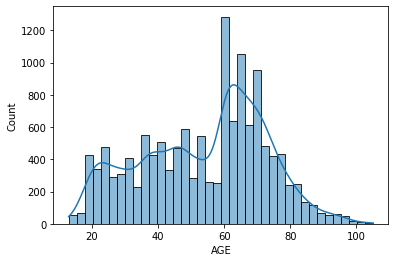

In [5]:
# Distribution of customers in the data set by age #

sns.histplot(data = train_data, x = 'AGE', kde = True)

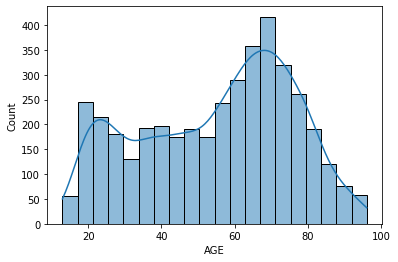

In [31]:
 # Distribution of individuals affected by fraud by age #

sns.histplot(data = train_data[train_data.FRAUD_NONFRAUD == 'Fraud'], x = 'AGE', kde = True)

In [7]:
age_dist_f = train_data[train_data.FRAUD_NONFRAUD == 'Fraud'].groupby('CUST_AGE')[['AGE']].count().sort_values('AGE', ascending = False).reset_index()

In [8]:
print('Proportion of Fraud Group Senior:',age_dist_f.AGE[0]/age_dist_f.AGE.sum(),'\n',
      'Proportion of Fraud Group Adult:',age_dist_f.AGE[1]/age_dist_f.AGE.sum(),'\n',
      'Proportion of Fraud Group Young Adult:',age_dist_f.AGE[2]/age_dist_f.AGE.sum())

Proportion of Fraud Group Senior: 0.4970674486803519 
 Proportion of Fraud Group Adult: 0.33235581622678395 
 Proportion of Fraud Group Young Adult: 0.1705767350928641


In [9]:

alert_ratio1['alert_ratio'] = alert_ratio1.fraud_hits/alert_ratio1.alert_counts
alert_ratio1.sort_values(['fraud_hits','alert_counts'],ascending = False).head(10)

#Note: top 10 ZIP codes with the most actual fraud hits and alert counts #


,Unnamed: 0,CUST_ZIP,fraud_hits,alert_counts,alert_ratio
42,1023,79423,9,17,0.529412
165,2185,99835,9,9,1.000000
135,1422,89103,8,10,0.800000
208,746,75062,8,8,1.000000
235,1833,93722,8,8,1.000000
56,1903,94589,7,15,0.466667
176,1772,93004,7,9,0.777778
240,1746,92688,7,8,0.875000
271,1431,89128,7,7,1.000000
280,298,33301,7,7,1.000000


# Geo Visualizations


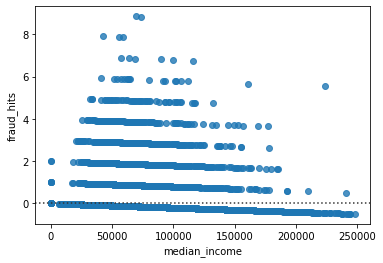

In [10]:
# Residuals plot of fraud based on the median income of a zip code #

outliers = geo_df.sort_values('fraud_hits',ascending= False)
sns.residplot(x = outliers.median_income,y = outliers.fraud_hits)

Based on the Residuals plot the more the median income of a respective zipcode the less likely it is to have a high risk of fraud associated with the it.

In [11]:
# Zipcodes with median incomes above 200,000 USD, is representative of a very small portion of the total population

train_data[train_data.median_income > 200000].CUST_ZIP.unique()

array([94506, 94507, 95120, 94563, 94022, 94105, 92657, 94028, 95030,
       76092, 22066, 11030, 10506,  6880])

In [12]:
# Median income for all zip code associated with instances of fraud #

avg_med = train_data[(train_data.FRAUD_NONFRAUD == 'Fraud')].groupby('CUST_ZIP')[['CUST_ZIP','median_income']].head()
avg_med.median_income.mean()

71032.69023485784

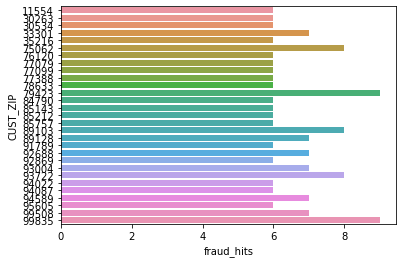

In [13]:
# All zip codes with 6 or more fraudlent transaction associated #

train_data1 = train_data[(train_data.FRAUD_NONFRAUD == 'Fraud') & (train_data.fraud_hits >= 6)]
fraud_hits = train_data1.groupby(['CUST_ZIP'])[['CUST_ZIP']].count().rename({'CUST_ZIP':'fraud_hits'}, axis = 'columns').reset_index().astype({'CUST_ZIP':'int64'})
top_fraud = fraud_hits.sort_values('fraud_hits',ascending = False)
sns.barplot(y = top_fraud.CUST_ZIP, x = top_fraud.fraud_hits, data = top_fraud, orient = 'h')

In [16]:
# Generates the city name of all zip code values with 6 fraudulent hits or more #

!pip install pyzipcode
from pyzipcode import ZipCodeDatabase


for zip in list(set(train_data1.CUST_ZIP)):
  try:
    zcdb = ZipCodeDatabase()
    print(zcdb[zip])
  except KeyError:
    continue

ZipCode(zip='94087', city='Sunnyvale', state='CA', longitude=-122.03602, latitude=37.350091, timezone=-8, dst=1)
ZipCode(zip='91789', city='Walnut', state='CA', longitude=-117.85438, latitude=34.018361, timezone=-8, dst=1)
ZipCode(zip='89103', city='Las Vegas', state='NV', longitude=-115.21849, latitude=36.113211, timezone=-8, dst=1)
ZipCode(zip='92688', city='Rancho Santa Margarita', state='CA', longitude=-117.60351, latitude=33.639994, timezone=-8, dst=1)
ZipCode(zip='35216', city='Birmingham', state='AL', longitude=-86.78489, latitude=33.420558, timezone=-6, dst=1)
ZipCode(zip='33301', city='Fort Lauderdale', state='FL', longitude=-80.13187, latitude=26.121114, timezone=-5, dst=1)
ZipCode(zip='77079', city='Houston', state='TX', longitude=-95.60125, latitude=29.773018, timezone=-6, dst=1)
ZipCode(zip='93722', city='Fresno', state='CA', longitude=-119.88878, latitude=36.801603, timezone=-8, dst=1)
ZipCode(zip='11554', city='East Meadow', state='NY', longitude=-73.55527, latitude=40.7

In [17]:
#top_fraud = fraud_hits.sort_values('fraud_hits',ascending = False).head(20)
#sns.barplot(y = top_fraud.CUST_ZIP.astype('str'), x = top_fraud.fraud_hits, data = top_fraud, orient = 'h')

In [18]:
# Median income for the entier nation based on ACS 2019 data #

geo_df.median_income.mean()

57194.0764511132

Text(0.5, 1.0, 'Median Income by US ZIP code')

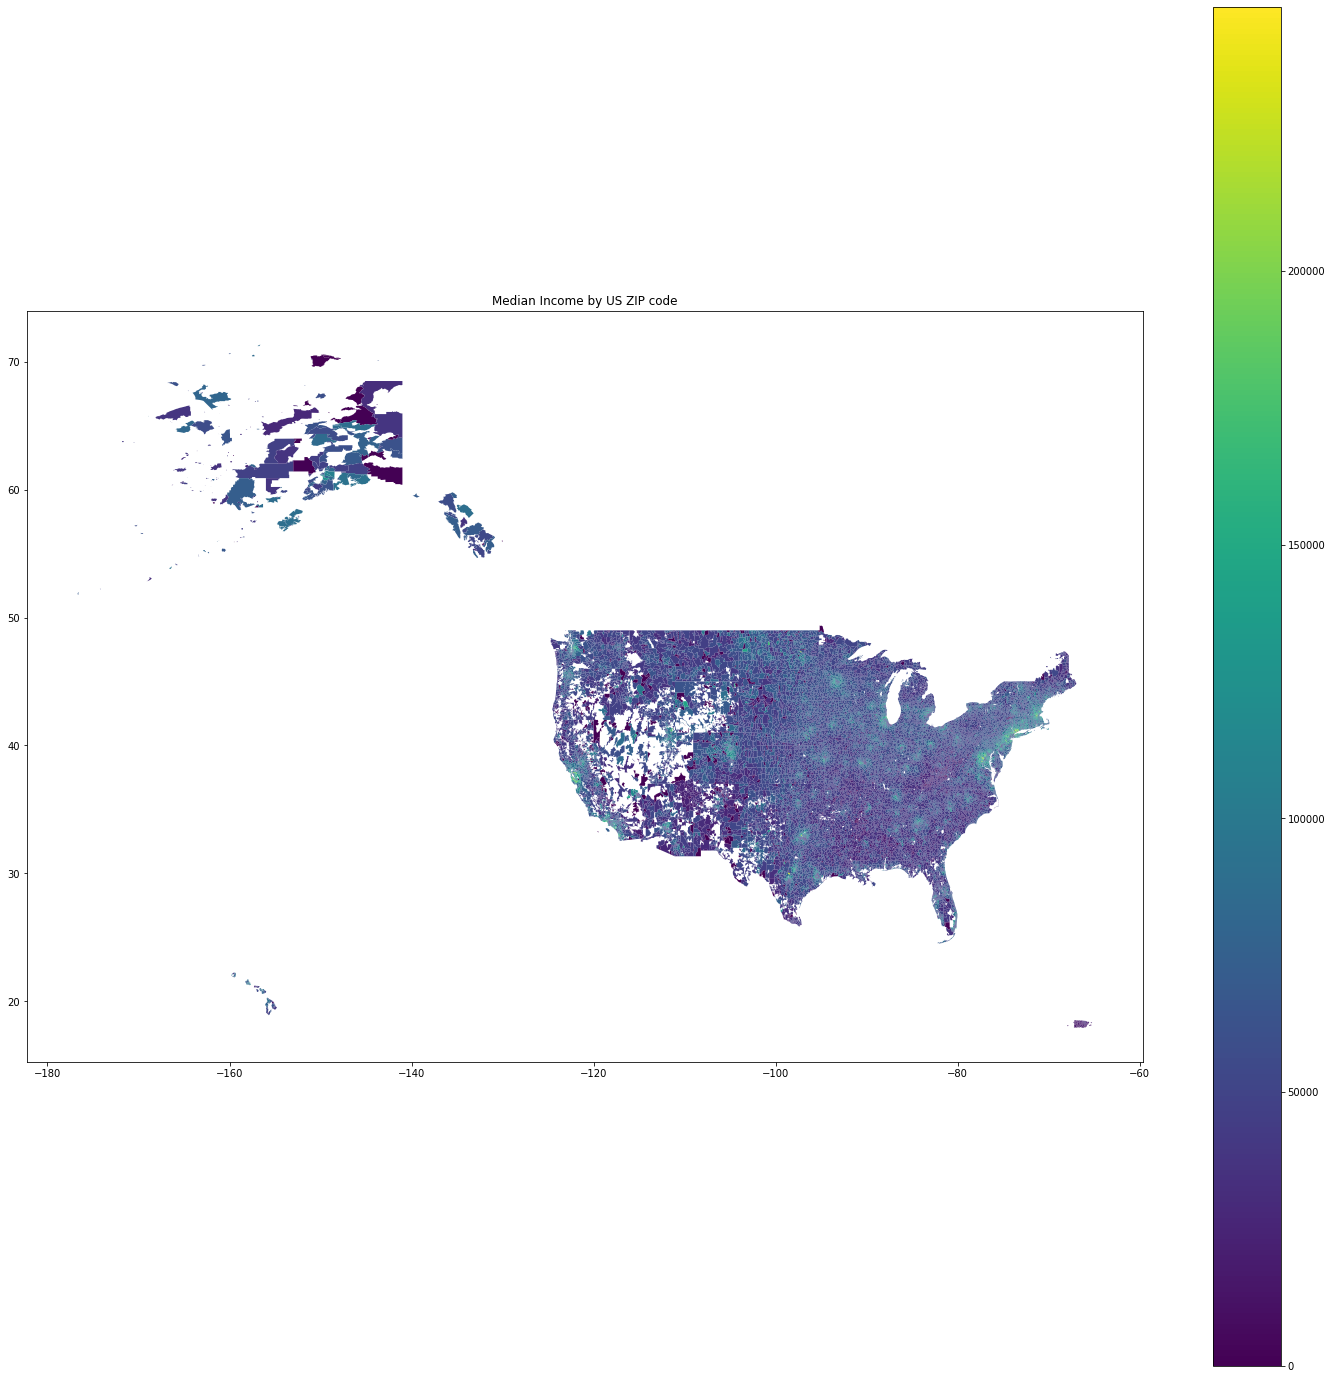

In [27]:
uszip_shapes = geo_df[(geo_df.INTPTLON20.astype('float64') <= -50)]
uszip_shapes.plot(cmap = 'viridis',column = 'median_income', legend = True, figsize = (25, 25)) # increase to 100,100 to be able to zoom in on the visualization
plt.title('Median Income by US ZIP code')

# Map represents the distribution in median income values by zip code for all zipcodes in the united states #

Visualization gives displays how income in varies throughout the country with most high income areas being closely associated with large urban centers. Could Scammers be specfically trageting zip code areas where there is a higher associated median income for its residents?

Text(0.5, 1.0, 'Instances of Fraud by ZIP code for Fraud Instances Represented by training data')

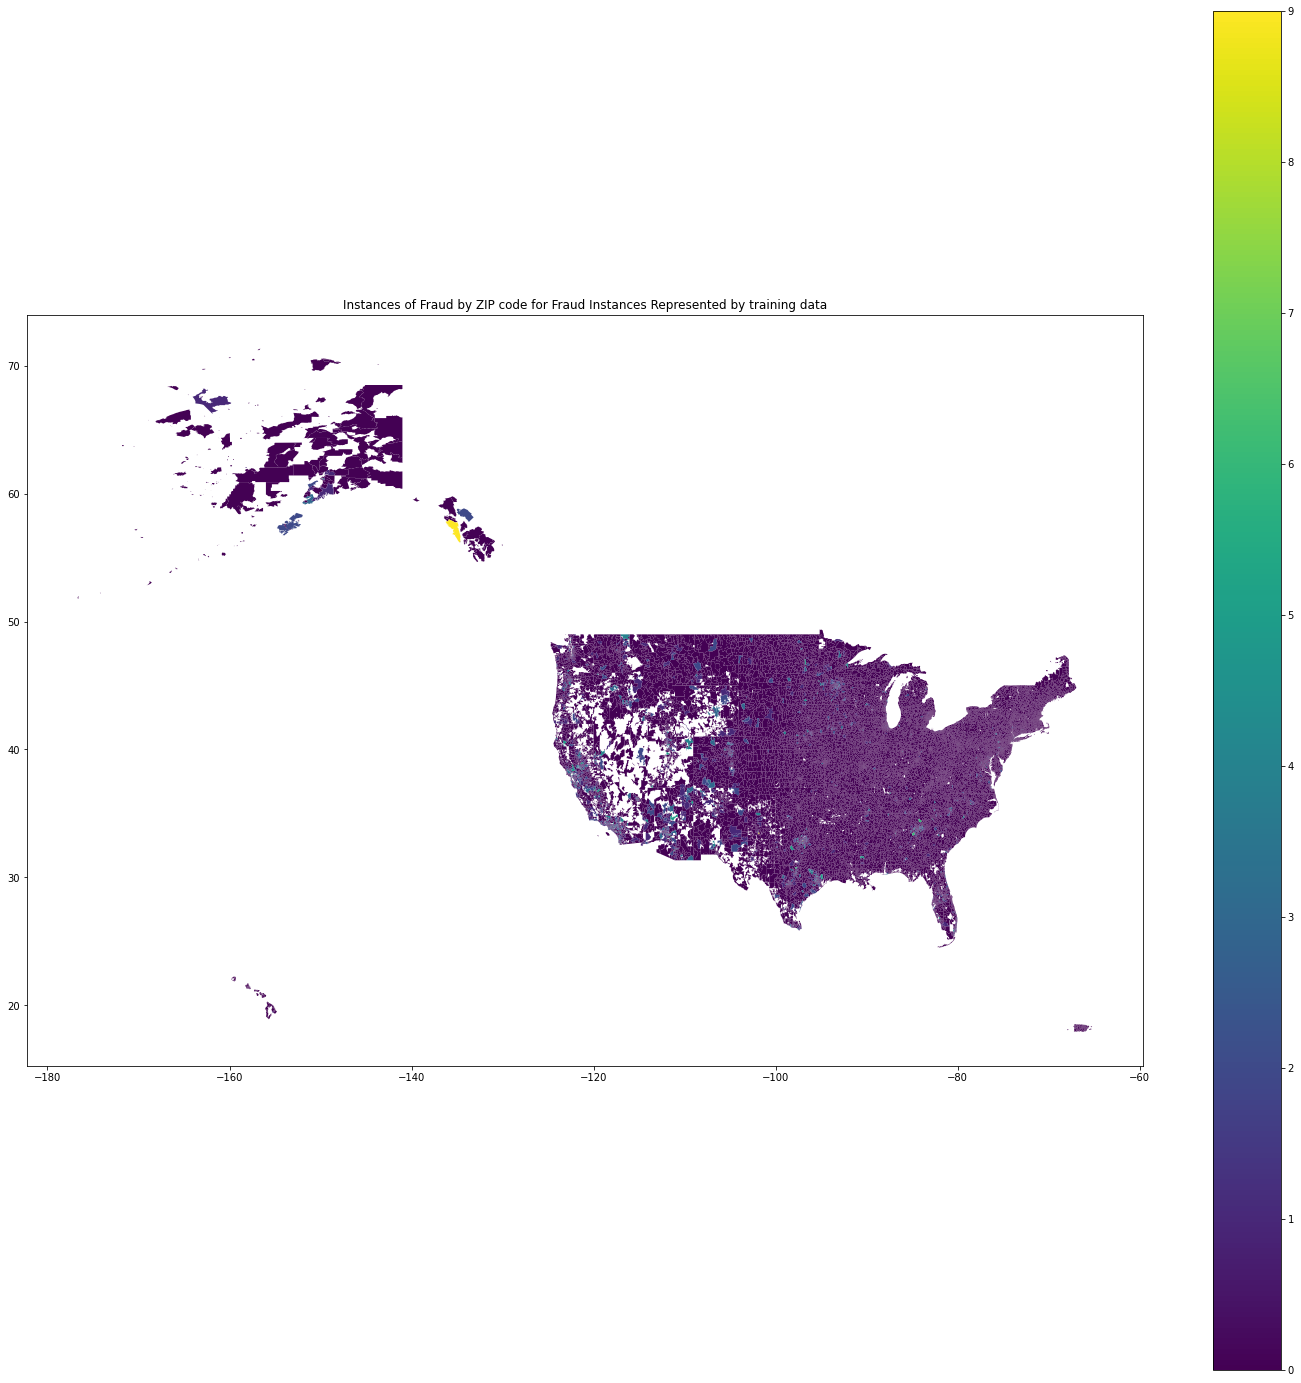

In [28]:
# Instances of Fraud by ZIP code for Fraud Instances Represented by training data # 

uszip_shapes20 = geo_df[(geo_df.INTPTLON20.astype('float64') <= -50)]
uszip_shapes20.plot(cmap = 'viridis',column = 'fraud_hits', legend = True, figsize = (25,25)) # increase to 100,100 to be able to zoom in on the visualization
plt.title('Instances of Fraud by ZIP code for Fraud Instances Represented by training data')

# Note: Lighter colored areas indicates areas where fradulent transactions occured according to the provided data. #

 For Wells Fargo data to some extent zip codes associated (is or near) with higher rates fraudulent transactions line up with ZIP codes that are associated with higher median incomes on average for the nation and are often in or near urban centers based on the comparison between the two above maps. However, as median income increases the rate of fradulent transactions decreases completely stopping around when 200,000 becomes the median income according to the residuals plot for the data set. We can also add that it appears that there is a negative correlation between median income and having high rates of fraud in an area.



In [22]:
zip_list = list()
ratio = list()
for zip in list(geo_df.ZCTA5CE20):
  zip_list.append(zip)
  if zip in list(train_data.CUST_ZIP):
    get_ratio = list(train_data[train_data.CUST_ZIP == zip]['fraud_alert_ratio'])[0]
    ratio.append(get_ratio)
  elif zip not in list(train_data.CUST_ZIP):
    ratio.append(0.0)

In [23]:
geo_df['fraud_alert_ratio'] = ratio

Text(0.5, 1.0, 'fraud_alert_ratio for US zip code for Wells Fargo Data Provided')

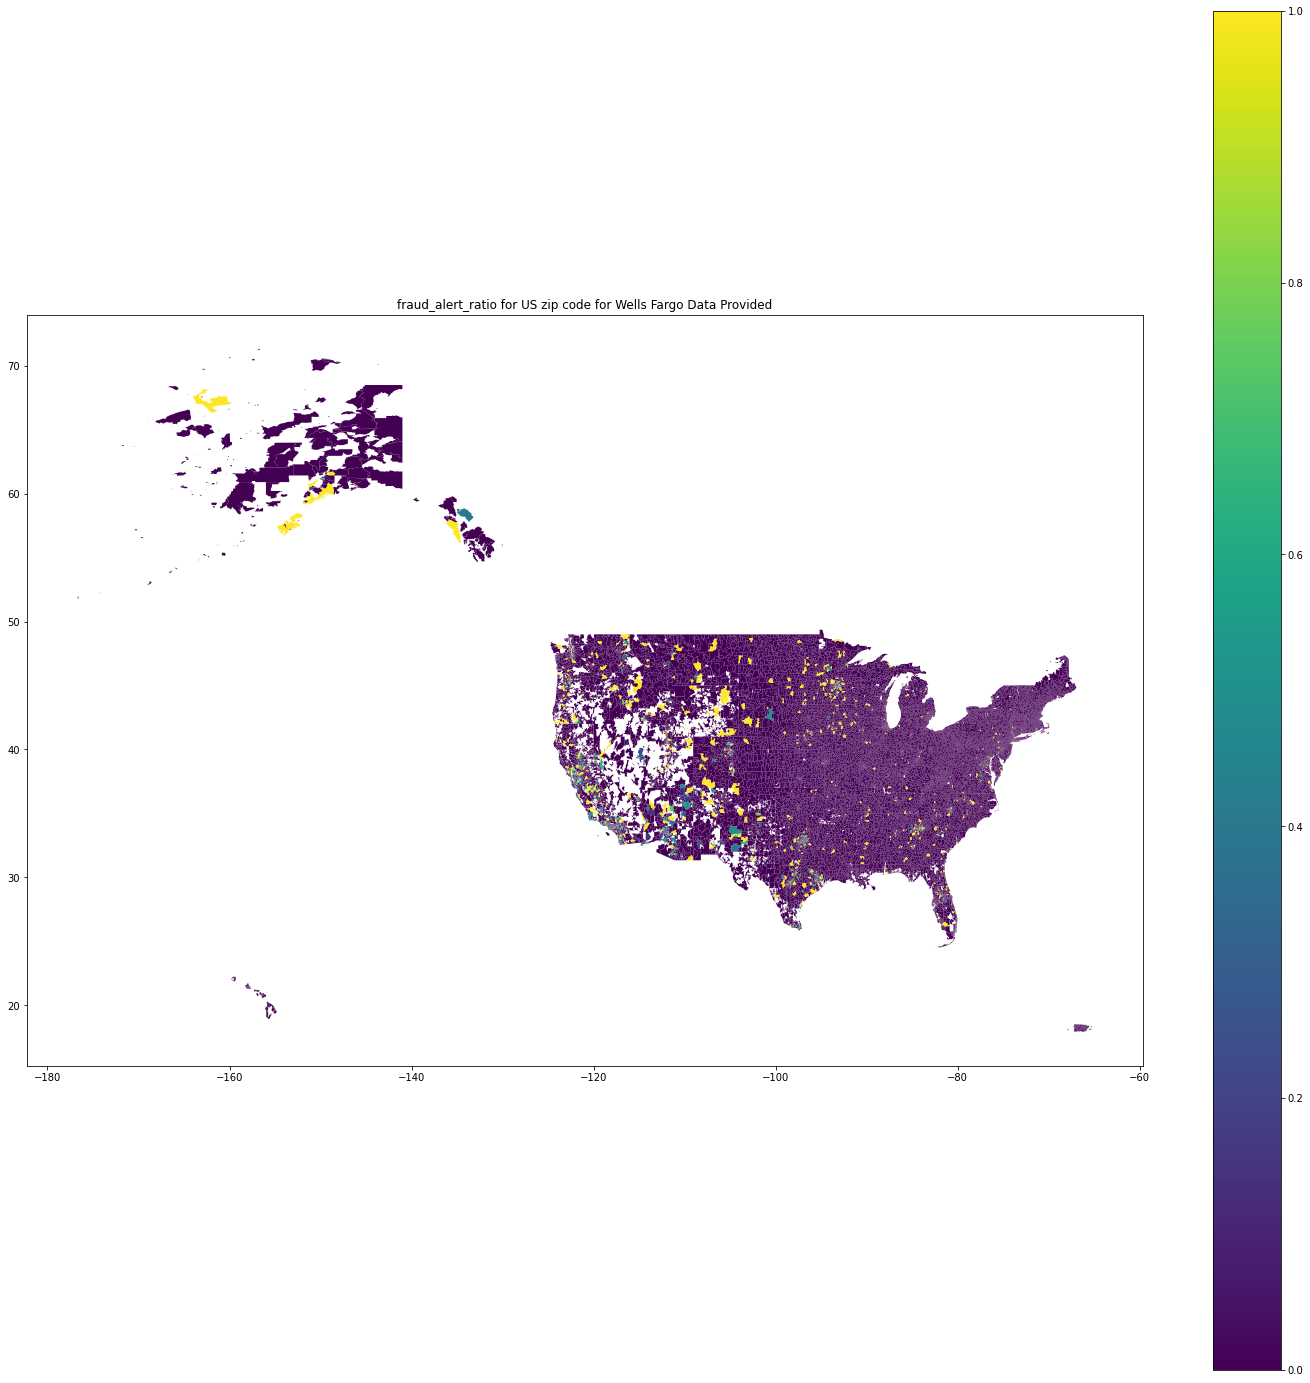

In [29]:
uszip_shapesf = geo_df[(geo_df.INTPTLON20.astype('float64') <= -50)]
uszip_shapesf.plot(cmap = 'viridis',column = 'fraud_alert_ratio', legend = True, figsize = (25, 25))
plt.title('fraud_alert_ratio for US zip code for Wells Fargo Data Provided')

Above visualization shows the number of fraud alerts were actually associated with a real case of fraud. We see in this visualization that the rate of detecting actual fraud attempts is high sporadic throughout the data avaliable.